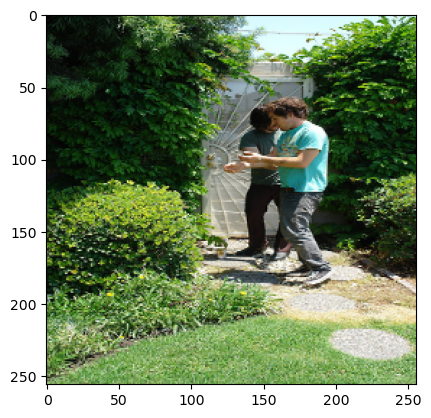

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
size = (256, 256)
num_channels = 3
sample_size = 40

# Directory containing the images
image_dir = r'C:\Users\user\Downloads\flickr30k_images\flickr30k_images'



# Get a list of image filenames (limited to sample_size)
train_images_list = os.listdir(image_dir)[:sample_size]

# Initialize the array to hold the images
train = np.zeros((sample_size, size[0], size[1], num_channels), dtype=np.uint8)

# Load and preprocess images
for j, image_name in enumerate(train_images_list):
    image_path = os.path.join(image_dir, image_name)
    img = cv2.imread(image_path)  # Load image with OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img_resized = cv2.resize(img, size)  # Resize image to the specified size
    train[j] = img_resized  # Store the resized image

# Display the first image in the dataset
plt.imshow(train[0])
plt.show()


In [6]:
image_path = os.path.join(image_dir, image_name)
print(image_path)  # Print the full path of the image


C:\Users\user\Downloads\flickr30k_images\flickr30k_images\1010087623.jpg


In [11]:
import pandas as pd

train_captions = pd.read_csv('C:/Users/user/Downloads/flickr30k_images/results.csv', delimiter='|')


In [12]:
# Clean column names by stripping any leading/trailing spaces
train_captions.columns = train_captions.columns.str.strip()

# Now try the mapping again
image_to_captions = train_captions.groupby('image_name')['comment'].apply(list).to_dict()

# Check the mapping for a few images
for image, captions in list(image_to_captions.items())[:5]:
    print(f"Image: {image}")
    for caption in captions:
        print(f"  Caption: {caption}")

Image: 1000092795.jpg
  Caption:  Two young guys with shaggy hair look at their hands while hanging out in the yard .
  Caption:  Two young , White males are outside near many bushes .
  Caption:  Two men in green shirts are standing in a yard .
  Caption:  A man in a blue shirt standing in a garden .
  Caption:  Two friends enjoy time spent together .
Image: 10002456.jpg
  Caption:  Several men in hard hats are operating a giant pulley system .
  Caption:  Workers look down from up above on a piece of equipment .
  Caption:  Two men working on a machine wearing hard hats .
  Caption:  Four men on top of a tall structure .
  Caption:  Three men on a large rig .
Image: 1000268201.jpg
  Caption:  A child in a pink dress is climbing up a set of stairs in an entry way .
  Caption:  A little girl in a pink dress going into a wooden cabin .
  Caption:  A little girl climbing the stairs to her playhouse .
  Caption:  A little girl climbing into a wooden playhouse 
  Caption:  A girl going int

In [21]:
train_captions.head()


image_name  comment_number  \
0  1000092795.jpg               0   
1  1000092795.jpg               1   
2  1000092795.jpg               2   
3  1000092795.jpg               3   
4  1000092795.jpg               4   

                                             comment  
0   Two young guys with shaggy hair look at their...  
1   Two young , White males are outside near many...  
2   Two men in green shirts are standing in a yard .  
3       A man in a blue shirt standing in a garden .  
4            Two friends enjoy time spent together .

In [22]:
print(train_captions.columns)

Index(['image_name', ' comment_number', ' comment'], dtype='object')


In [23]:
# Clean column names by stripping any leading/trailing spaces
train_captions.columns = train_captions.columns.str.strip()

# Now try the mapping again
image_to_captions = train_captions.groupby('image_name')['comment'].apply(list).to_dict()

# Check the mapping for a few images
for image, captions in list(image_to_captions.items())[:5]:
    print(f"Image: {image}")
    for caption in captions:
        print(f"  Caption: {caption}")


Image: 1000092795.jpg
  Caption:  Two young guys with shaggy hair look at their hands while hanging out in the yard .
  Caption:  Two young , White males are outside near many bushes .
  Caption:  Two men in green shirts are standing in a yard .
  Caption:  A man in a blue shirt standing in a garden .
  Caption:  Two friends enjoy time spent together .
Image: 10002456.jpg
  Caption:  Several men in hard hats are operating a giant pulley system .
  Caption:  Workers look down from up above on a piece of equipment .
  Caption:  Two men working on a machine wearing hard hats .
  Caption:  Four men on top of a tall structure .
  Caption:  Three men on a large rig .
Image: 1000268201.jpg
  Caption:  A child in a pink dress is climbing up a set of stairs in an entry way .
  Caption:  A little girl in a pink dress going into a wooden cabin .
  Caption:  A little girl climbing the stairs to her playhouse .
  Caption:  A little girl climbing into a wooden playhouse 
  Caption:  A girl going int

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set the path to the images directory
image_dir = r"C:\Users\user\Downloads\flickr30k_images\flickr30k_images"

# Function to display an image with its captions
def display_image_with_captions(image_name, captions):
    # Open the image
    image_path = os.path.join(image_dir, image_name)
    img = Image.open(image_path)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')  # Hide axes for better view
    plt.title(f"Image: {image_name}", fontsize=16)

    # Print captions
    print(f"Image: {image_name}")
    for caption in captions:
        print(f"  Caption: {caption}")
    
    plt.show()

# Randomly select an image and its captions
image, captions = list(image_to_captions_filtered.items())[0]  # Select the first image

# Display the image and its captions
display_image_with_captions(image, captions)


NameError: name 'image_to_captions_filtered' is not defined

In [25]:
# Let's print the first image and its captions
image_name = list(image_to_captions.keys())[0]
captions = image_to_captions[image_name]

print(f"Image: {image_name}")
for caption in captions:
    print(f"  Caption:  {caption}")


Image: 1000092795.jpg
  Caption:   Two young guys with shaggy hair look at their hands while hanging out in the yard .
  Caption:   Two young , White males are outside near many bushes .
  Caption:   Two men in green shirts are standing in a yard .
  Caption:   A man in a blue shirt standing in a garden .
  Caption:   Two friends enjoy time spent together .


In [26]:
import os
import pandas as pd

# Load the captions CSV file
train_captions = pd.read_csv(r"C:\Users\user\Downloads\flickr30k_images\results.csv", delimiter='|')

# Clean column names by stripping any leading/trailing spaces
train_captions.columns = train_captions.columns.str.strip()

# Create the mapping of image names to captions
image_to_captions = train_captions.groupby('image_name')['comment'].apply(list).to_dict()

# List the images in the folder
image_folder = r"C:\Users\user\Downloads\flickr30k_images\flickr30k_images"
image_files = os.listdir(image_folder)

# Filter the images that are in the folder
image_to_captions_filtered = {image: captions for image, captions in image_to_captions.items() if image in image_files}

# Print the first few image and caption mappings
for image, captions in list(image_to_captions_filtered.items())[:5]:
    print(f"Image: {image}")
    for caption in captions:
        print(f"  Caption: {caption}")


Image: 1000092795.jpg
  Caption:  Two young guys with shaggy hair look at their hands while hanging out in the yard .
  Caption:  Two young , White males are outside near many bushes .
  Caption:  Two men in green shirts are standing in a yard .
  Caption:  A man in a blue shirt standing in a garden .
  Caption:  Two friends enjoy time spent together .
Image: 10002456.jpg
  Caption:  Several men in hard hats are operating a giant pulley system .
  Caption:  Workers look down from up above on a piece of equipment .
  Caption:  Two men working on a machine wearing hard hats .
  Caption:  Four men on top of a tall structure .
  Caption:  Three men on a large rig .
Image: 1000268201.jpg
  Caption:  A child in a pink dress is climbing up a set of stairs in an entry way .
  Caption:  A little girl in a pink dress going into a wooden cabin .
  Caption:  A little girl climbing the stairs to her playhouse .
  Caption:  A little girl climbing into a wooden playhouse 
  Caption:  A girl going int

Image: 1000092795.jpg
  Caption:  Two young guys with shaggy hair look at their hands while hanging out in the yard .
  Caption:  Two young , White males are outside near many bushes .
  Caption:  Two men in green shirts are standing in a yard .
  Caption:  A man in a blue shirt standing in a garden .
  Caption:  Two friends enjoy time spent together .


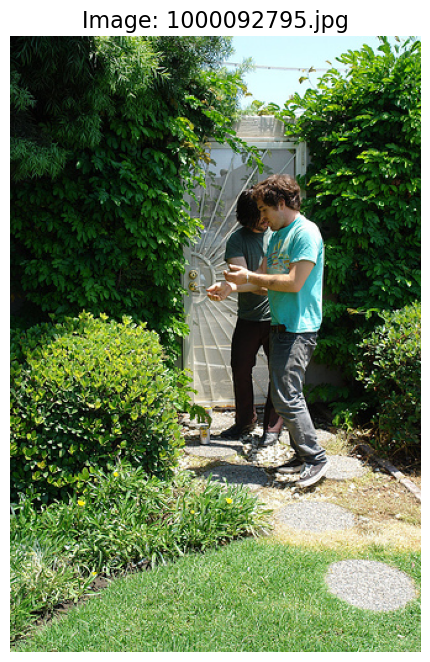

In [27]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set the path to the images directory
image_dir = r"C:\Users\user\Downloads\flickr30k_images\flickr30k_images"

# Function to display an image with its captions
def display_image_with_captions(image_name, captions):
    # Open the image
    image_path = os.path.join(image_dir, image_name)
    img = Image.open(image_path)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')  # Hide axes for better view
    plt.title(f"Image: {image_name}", fontsize=16)

    # Print captions
    print(f"Image: {image_name}")
    for caption in captions:
        print(f"  Caption: {caption}")
    
    plt.show()

# Randomly select an image and its captions
image, captions = list(image_to_captions_filtered.items())[0]  # Select the first image

# Display the image and its captions
display_image_with_captions(image, captions)


Image: 4808273728.jpg
  Caption:  Two men and a woman are sitting at a table , the lady is holding a microphone and talking .
  Caption:  Two white men and an African-American woman sitting at a table with a microphone .
  Caption:  A young woman speaks into a microphone while two men watch and listen to her .
  Caption:  A woman in a brown dress is interviewing two men .
  Caption:  Blue collar workers at a convention .


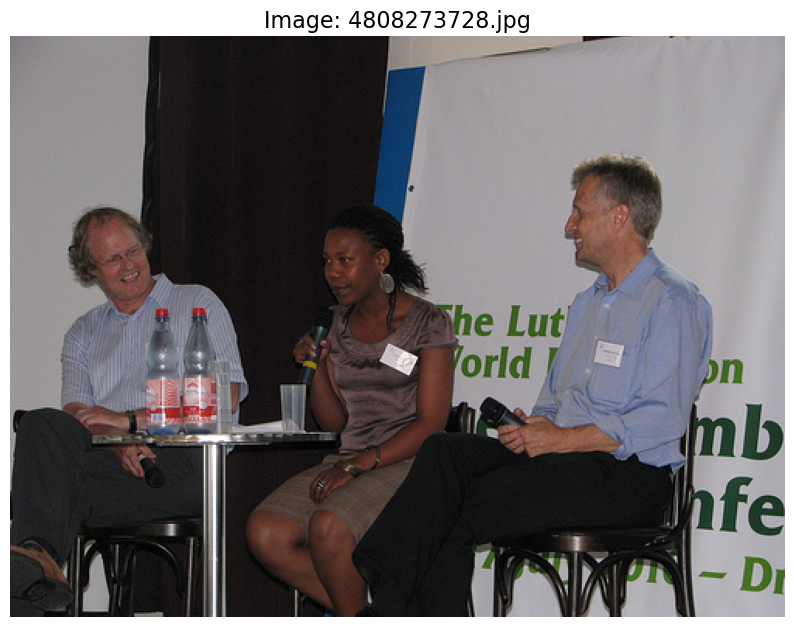

In [28]:
import random

# Randomly select an image and its captions
image, captions = random.choice(list(image_to_captions_filtered.items()))

# Display the image and its captions
display_image_with_captions(image, captions)


In [29]:
pip install tensorflow torch torchvision transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Load the pre-trained ResNet50 model for feature extraction (without the top layer)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to extract image features
def extract_image_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Get image features
    features = model.predict(img_array)
    return features.flatten()  # Flatten the features to make it a 1D array

# Example usage
image_path = os.path.join(image_dir, image_name)
image_features = extract_image_features(image_path)
print("Image features extracted.")





1/1 [==============================] - 3s 3s/step
Image features extracted.


In [31]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to extract features from a caption using BERT
def extract_caption_features(caption):
    inputs = tokenizer(caption, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the mean of the last hidden states (pooler output)
    caption_features = outputs.last_hidden_state.mean(dim=1).numpy()
    return caption_features.flatten()

# Example usage
caption_features = extract_caption_features(captions[0])  # Use the first caption
print("Caption features extracted.")


Caption features extracted.


In [36]:
import numpy as np

# Resizing or truncating image features to match caption features
def resize_image_features(image_features, target_dim=768):
    # If the image feature is larger, truncate it
    if len(image_features) > target_dim:
        image_features_resized = image_features[:target_dim]
    # If the image feature is smaller, pad it (not likely in this case)
    else:
        image_features_resized = np.pad(image_features, (0, target_dim - len(image_features)))
    return image_features_resized

# Resize image features to match caption features
image_features_resized = resize_image_features(image_features)
similarity_score = calculate_similarity(image_features_resized, caption_features)
print(f"Similarity between image and caption: {similarity_score}")


Similarity between image and caption: 27.40481185913086


In [41]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Set image directory
image_dir = r"C:\Users\user\Downloads\flickr30k_images\flickr30k_images"
image_name = "1000092795.jpg"  # Change to your image file name
image_path = os.path.join(image_dir, image_name)

# Function to extract image features using CLIP
def extract_image_features(image_path):
    # Open the image
    image = Image.open(image_path)
    
    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt", padding=True)
    
    # Get image features
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
    
    return image_features

# Extract image features
image_features = extract_image_features(image_path)
print("Extracted image features:", image_features.shape)

# List of given captions
given_captions = [
    "Two young guys with shaggy hair look at their...",
    "Two young, White males are outside near many...",
    "Two men in green shirts are standing in a yard.",
    "A man in a blue shirt standing in a garden.",
    "Two friends enjoy time spent together."
]

# Function to extract text features from captions
def extract_text_features(captions):
    # Preprocess the text
    inputs = processor(text=captions, return_tensors="pt", padding=True)
    
    # Get text features
    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
    
    return text_features

# Extract text features for given captions
text_features = extract_text_features(given_captions)
print("Extracted text features:", text_features.shape)

# Calculate cosine similarity between image and text features
def compare_features(image_features, text_features):
    # Normalize features to unit vectors for cosine similarity
    image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True)
    
    # Compute cosine similarity between image and text
    similarity_scores = cosine_similarity(image_features.cpu().numpy(), text_features.cpu().numpy())
    
    # Return similarity scores
    return similarity_scores

# Compare image features with text features
similarity_scores = compare_features(image_features, text_features)

# Print similarity scores between image and each caption
for idx, score in enumerate(similarity_scores[0]):
    print(f"Similarity between image and given caption {idx+1}: {score:.4f}")


Extracted image features: torch.Size([1, 512])
Extracted text features: torch.Size([5, 512])
Similarity between image and given caption 1: 0.2538
Similarity between image and given caption 2: 0.2431
Similarity between image and given caption 3: 0.3286
Similarity between image and given caption 4: 0.2988
Similarity between image and given caption 5: 0.2481


In [42]:
pip install transformers torch torchvision


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img1.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use BLIP model to extract features for both captions
input_features = processor(input_caption, return_tensors="pt", padding=True, truncation=True).input_ids
generated_features = processor(generated_caption, return_tensors="pt", padding=True, truncation=True).input_ids

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_features, generated_features)
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a small white dog standing on the ground


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img2.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use BLIP model to extract features for both captions
input_features = processor(input_caption, return_tensors="pt", padding=True, truncation=True).input_ids
generated_features = processor(generated_caption, return_tensors="pt", padding=True, truncation=True).input_ids

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_features, generated_features)
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")


Generated Caption: a little boy in cowboy gear is standing next to a horse


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img3.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use BLIP model to extract features for both captions
input_features = processor(input_caption, return_tensors="pt", padding=True, truncation=True).input_ids
generated_features = processor(generated_caption, return_tensors="pt", padding=True, truncation=True).input_ids

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_features, generated_features)
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")


Generated Caption: a little girl eating a bowl of fruit


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img3.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use the BLIP processor to extract embeddings for both captions
input_features = processor(input_caption, return_tensors="pt", padding=True, truncation=True).pixel_values
generated_features = processor(generated_caption, return_tensors="pt", padding=True, truncation=True).pixel_values

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_features.detach().numpy(), generated_features.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis



Generated Caption: a little girl eating a bowl of fruit


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img4.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use the BLIP processor to extract embeddings for both captions
input_features = processor(input_caption, return_tensors="pt", padding=True, truncation=True).pixel_values
generated_features = processor(generated_caption, return_tensors="pt", padding=True, truncation=True).pixel_values

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_features.detach().numpy(), generated_features.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis



Generated Caption: a man in a suit singing into a microphone


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img3.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use BLIP processor to extract text features for both captions
input_features = processor.tokenizer(input_caption, return_tensors="pt", padding=True, truncation=True).input_ids
generated_features = processor.tokenizer(generated_caption, return_tensors="pt", padding=True, truncation=True).input_ids

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_features.detach().numpy(), generated_features.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a little girl eating a bowl of fruit


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 7 while Y.shape[1] == 10

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img5.webp"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")

# # Input caption to compare with
# input_caption = "Dog playing on the ground"

# # Use BLIP processor to extract text features for both captions
# input_features = processor.tokenizer(input_caption, return_tensors="pt", padding=True, truncation=True).input_ids
# generated_features = processor.tokenizer(generated_caption, return_tensors="pt", padding=True, truncation=True).input_ids

# # Calculate cosine similarity between the two caption features
# similarity_score = cosine_similarity(input_features.detach().numpy(), generated_features.detach().numpy())
# print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# # Show the image
# img = Image.open(image_path)
# plt.imshow(img)
# plt.axis('off')  # Hide axis
# plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: the great wave off kanagawa


In [57]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img3.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use BLIP model to extract features for both captions
input_features = processor(input_caption, return_tensors="pt", padding=True, truncation=True).input_ids
generated_features = processor(generated_caption, return_tensors="pt", padding=True, truncation=True).input_ids

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_features.detach().numpy(), generated_features.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Optionally, show the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()


Generated Caption: a little girl eating a bowl of fruit


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")
q
    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img4.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Use the BLIP processor to extract embeddings for both captions
input_features = processor(input_caption, return_tensors="pt", padding=True, truncation=True)
generated_features = processor(generated_caption, return_tensors="pt", padding=True, truncation=True)

# Get text embeddings (using the model's language model, which processes the tokenized inputs)
input_text_embeddings = model.get_text_features(**input_features)
generated_text_embeddings = model.get_text_features(**generated_features)

# Calculate cosine similarity between the two caption features
similarity_score = cosine_similarity(input_text_embeddings.detach().numpy(), generated_text_embeddings.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


Generated Caption: a man in a suit singing into a microphone


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

Generated Caption: a man in a suit singing into a microphone


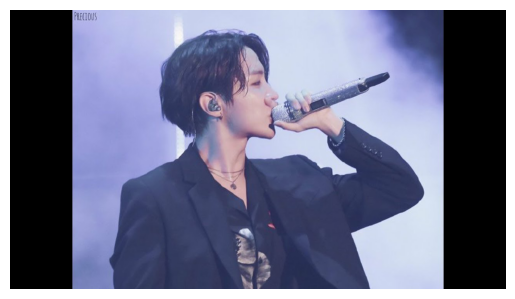

AttributeError: 'BlipForConditionalGeneration' object has no attribute 'get_text_features'

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img4.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide axis
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Tokenize both captions (input and generated)
input_tokens = processor.tokenizer(input_caption, return_tensors="pt", padding=True, truncation=True)
generated_tokens = processor.tokenizer(generated_caption, return_tensors="pt", padding=True, truncation=True)

# Get embeddings for both captions using the model's language model
input_embeddings = model.get_text_features(**input_tokens)
generated_embeddings = model.get_text_features(**generated_tokens)

# Calculate cosine similarity between the two caption embeddings
similarity_score = cosine_similarity(input_embeddings.detach().numpy(), generated_embeddings.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


Generated Caption: the great wave off kanagawa


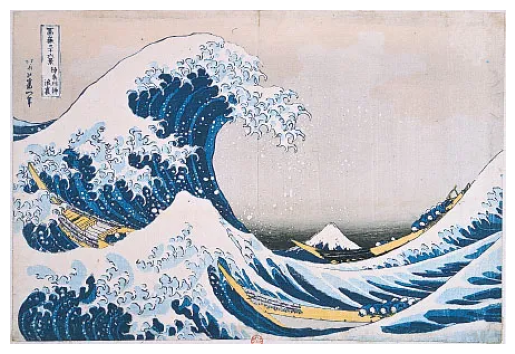

AttributeError: 'BlipForConditionalGeneration' object has no attribute 'get_text_features'

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img5.webp"
# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide axis
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Tokenize both captions (input and generated)
input_tokens = processor.tokenizer(input_caption, return_tensors="pt", padding=True, truncation=True)
generated_tokens = processor.tokenizer(generated_caption, return_tensors="pt", padding=True, truncation=True)

# Get embeddings for both captions using the model's language model
input_embeddings = model.get_text_features(**input_tokens)
generated_embeddings = model.get_text_features(**generated_tokens)

# Calculate cosine similarity between the two caption embeddings
similarity_score = cosine_similarity(input_embeddings.detach().numpy(), generated_embeddings.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


Generated Caption: a small white dog standing on the ground


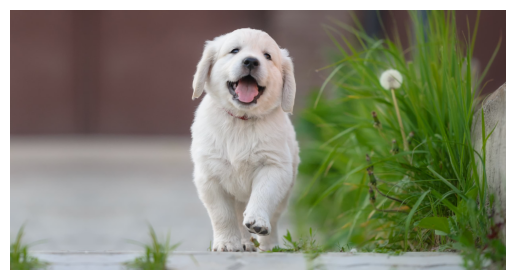

AttributeError: 'BlipForConditionalGeneration' object has no attribute 'text_encoder'

In [61]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img1.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide axis
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Tokenize both captions (input and generated)
input_tokens = processor.tokenizer(input_caption, return_tensors="pt", padding=True, truncation=True)
generated_tokens = processor.tokenizer(generated_caption, return_tensors="pt", padding=True, truncation=True)

# Get text embeddings for both captions using the model's text encoder
input_embeddings = model.text_encoder(input_tokens.input_ids)[0][:, 0, :]  # [CLS] token representation
generated_embeddings = model.text_encoder(generated_tokens.input_ids)[0][:, 0, :]  # [CLS] token representation

# Calculate cosine similarity between the two caption embeddings
similarity_score = cosine_similarity(input_embeddings.detach().numpy(), generated_embeddings.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


Generated Caption: a train car with two windows and a view of the city


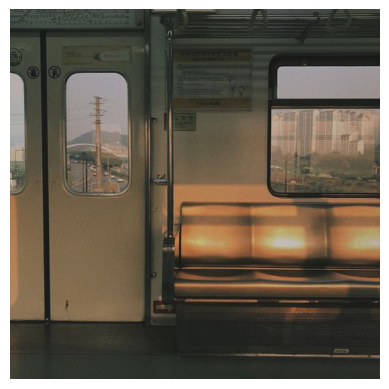

AttributeError: 'BlipForConditionalGeneration' object has no attribute 'text_encoder'

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img6.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide axis
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Tokenize both captions (input and generated)
input_tokens = processor.tokenizer(input_caption, return_tensors="pt", padding=True, truncation=True)
generated_tokens = processor.tokenizer(generated_caption, return_tensors="pt", padding=True, truncation=True)

# Get text embeddings for both captions using the model's text encoder
input_embeddings = model.text_encoder(input_tokens.input_ids)[0][:, 0, :]  # [CLS] token representation
generated_embeddings = model.text_encoder(generated_tokens.input_ids)[0][:, 0, :]  # [CLS] token representation

# Calculate cosine similarity between the two caption embeddings
similarity_score = cosine_similarity(input_embeddings.detach().numpy(), generated_embeddings.detach().numpy())
print(f"Cosine similarity between the captions: {similarity_score[0][0]}")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


Generated Caption: a small white dog standing on the ground
Similar OK


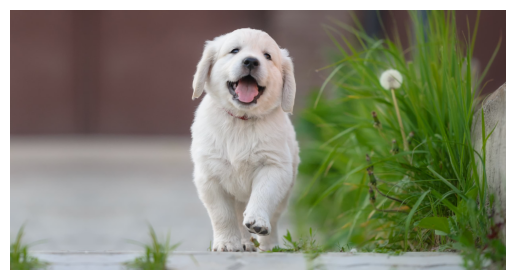

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img1.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide axis
# plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Tokenize both captions (input and generated) and find the set of words
input_words = set(input_caption.lower().split())  # Convert to lowercase and split into words
generated_words = set(generated_caption.lower().split())

# Find common words and calculate similarity
common_words = input_words.intersection(generated_words)
similar_count = len(common_words)
non_similar_count = len(input_words) + len(generated_words) - 2 * similar_count

# If more similar words than non-similar, print "Similar OK"
if similar_count > (non_similar_count/2):
    print("Similar OK")
else:
    print("Not Similar")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a little girl eating a bowl of fruit


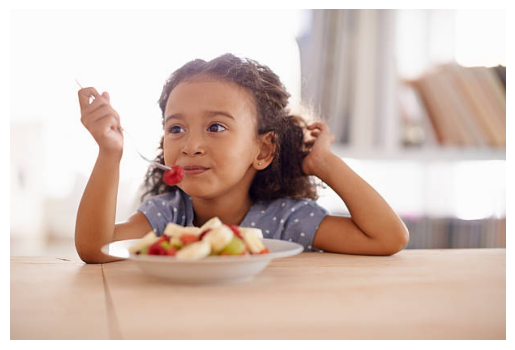

Not Similar


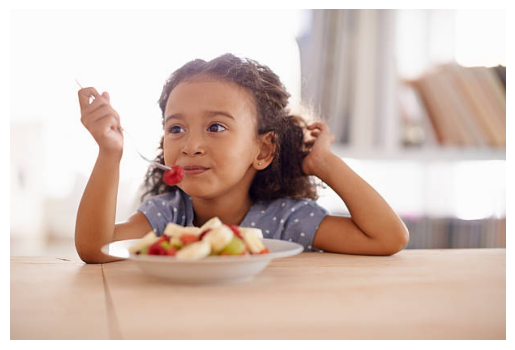

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img3.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide axis
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Tokenize both captions (input and generated) and find the set of words
input_words = set(input_caption.lower().split())  # Convert to lowercase and split into words
generated_words = set(generated_caption.lower().split())

# Find common words and calculate similarity
common_words = input_words.intersection(generated_words)
similar_count = len(common_words)
non_similar_count = len(input_words) + len(generated_words) - 2 * similar_count

# If more similar words than non-similar, print "Similar OK"
if similar_count > non_similar_count:
    print("Similar OK")
else:
    print("Not Similar")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


Generated Caption: a small white dog standing on the ground


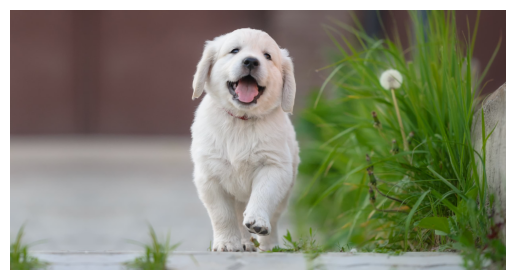

Similar OK


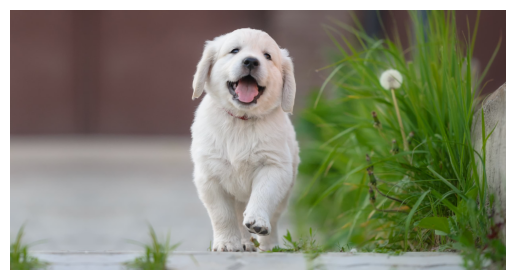

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Define a function to generate a caption from the image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    generated_caption = processor.decode(out[0], skip_special_tokens=True)
    
    return generated_caption

# Path to your image
image_path = "C:/Users/user/Downloads/img1.jpg"

# Generate caption for the image
generated_caption = generate_caption(image_path)
print(f"Generated Caption: {generated_caption}")
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide axis
plt.show()

# Input caption to compare with
input_caption = "Dog playing on the ground"

# Tokenize both captions (input and generated) and find the set of words
input_words = set(input_caption.lower().split())  # Convert to lowercase and split into words
generated_words = set(generated_caption.lower().split())

# Find common words and calculate similarity
common_words = input_words.intersection(generated_words)
similar_count = len(common_words)
non_similar_count = len(input_words) + len(generated_words) - 2 * similar_count

# If more similar words than non-similar, print "Similar OK"
if similar_count > (non_similar_count/2):
    print("Similar OK")
else:
    print("Not Similar")

# Show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()
